# Tracking the Growth of COVID-19 Cases

The purpose of this notebook is to display the 7 day rolling average of confirmed cases of COVID-19 in various locations in the US.

**The notebook pulls data from the Johns Hopkins [Data Repository](https://github.com/CSSEGISandData/COVID-19) of global Coronavirus COVID-19 cases**, and then does the following things:

- Gives the data in a series of grid views (Country, State, County)
- Gives the data in a series of charts (scroll to bottom)


## Important Caveats:

- The confirmed cases are not the number of infections in each country, only those that have tested positive.


In [1]:
# **** NOTE: THIS RUNS ON PYTHON 3.7 ****
%run covid_base.py "California" "Los Angeles"

Today's date: 2020-12-05 11:00:03.522670


## Global COVID-19 Analysis

In [2]:
principality = 'Country/Region'
cases, ds = get_cases_ds(principality, dfGlobalConfirmed, dfGlobalDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, dfGlobalConfirmed, dfGlobalDeaths)
print('\nTotal number of cases as of', mostrecentdatecases)
casessummary


Total number of cases as of 12/4/20


,12/4/20 cases,Deaths,Death_rate_pct
Country/Region,,,
US,14367462,278932,1.94
Brazil,6533968,175964,2.69
India,9608211,139700,1.45
Mexico,1156770,108863,9.41
United Kingdom,1694800,60714,3.58
Italy,1688939,58852,3.48
France,2321703,54859,2.36


## COVID-19 Country-by-Country Format for Further Analysis

In [3]:
casegrouped = cases.groupby(principality).sum().reset_index()
mc = melt_dataframes_date(casegrouped, principality, caseName)

dsgrouped = ds.groupby(principality).sum().reset_index()
md = melt_dataframes_date(dsgrouped, principality, dName)

countryData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed US cases as of', mostrecentdatecases)
#print('\nNote: if the number of current deaths (high and close) are 0, the dates here will not display')

countryDataTA = dfLocale(countryData, principality, localeName='US')
countryDataTA.sort_values(by='date', ascending=False)[:7]


Number of confirmed US cases as of 12/4/20


,Country/Region,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
55647,US,13921913,2020-12-02,273446.0,2804.0,200055.0,164180.000000
55646,US,13721858,2020-12-01,270642.0,2597.0,180637.0,161498.857143
55645,US,13541221,2020-11-30,268045.0,1172.0,157851.0,160406.142857
55644,US,13383370,2020-11-29,266873.0,826.0,138669.0,162358.142857
55643,US,13244701,2020-11-28,266047.0,1189.0,155880.0,162949.285714
55642,US,13088821,2020-11-27,264858.0,1402.0,205514.0,166123.142857
55641,US,12883307,2020-11-26,263456.0,1234.0,110654.0,164695.142857


## US State-by-State COVID-19 Analysis

In [4]:
principality = 'Province_State'
uscases, usds = get_cases_ds(principality, dfUSConfirmed, dfUSDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, uscases, usds)
print('\nTotal number of cases as of', mostrecentdatecases)
casessummary


Total number of cases as of 12/4/20


,12/4/20 cases,Deaths,Death_rate_pct
Province_State,,,
New York,685364,34830.0,5.08
Texas,1299469,22825.0,1.76
California,1310307,19734.0,1.51
Florida,1039207,18994.0,1.83
New Jersey,356662,17255.0,4.84
Illinois,770088,13782.0,1.79
Pennsylvania,404521,11052.0,2.73


## COVID-19 State-by-State Format for Further Analysis

In [5]:
uscasegrouped = uscases.groupby(principality).sum().reset_index()
mc = melt_dataframes_date(uscasegrouped, principality, caseName)

usdsgrouped = usds.groupby(principality).sum().reset_index()
md = melt_dataframes_date(usdsgrouped, principality, dName)

stateData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed ' + home_state + ' COVID-19 cases and deaths by county as of', mostrecentdatecases)

#stateData
stateDataTA = dfLocale(stateData, principality, localeName=home_state)
stateDataTA.sort_values(by='date', ascending=False)[:7]


Number of confirmed California COVID-19 cases and deaths by county as of 12/4/20


,Province_State,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
1905,California,1265182,2020-12-02,19410.0,106.0,19140.0,14891.714286
1904,California,1246042,2020-12-01,19304.0,131.0,15778.0,14404.714286
1903,California,1230264,2020-11-30,19173.0,22.0,14809.0,14577.857143
1902,California,1215455,2020-11-29,19151.0,35.0,14831.0,14418.714286
1901,California,1200624,2020-11-28,19116.0,27.0,15048.0,13598.428571
1900,California,1185576,2020-11-27,19089.0,64.0,13774.0,13689.428571
1899,California,1171802,2020-11-26,19025.0,57.0,10862.0,13518.285714


## County-by-County COVID-19 Analysis 

In [6]:
principality = 'County'
stateCases, stateDs = get_cases_ds(principality, dfUSConfirmed, dfUSDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, stateCases, stateDs)
print('\nNumber of confirmed ' + home_state + ' cases as of', mostrecentdatecases)
casessummary



Number of confirmed California cases as of 12/4/20


,12/4/20 cases,Deaths,Death_rate_pct
County,,,
Los Angeles,430583,7842.0,1.82
Orange,82887,1603.0,1.93
Riverside,92489,1472.0,1.59
San Bernardino,100787,1154.0,1.14
San Diego,88181,1047.0,1.19
Sacramento,40305,603.0,1.50
Alameda,31204,522.0,1.67


## COVID-19 County-by-County Format for Further Analysis

In [7]:
mc = melt_dataframes_date(stateCases, principality, caseName)
md = melt_dataframes_date(stateDs, principality, dName)

countyData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed ' + home_state + ' cases by county as of', mostrecentdatecases)
#print('\nNote: if the number of current deaths (high and close) are 0, the dates here will not display')

countyData
countyDataTA = dfLocale(countyData, principality, localeName=home_county)
countyDataTA.sort_values(by='date', ascending=False)[:11]


Number of confirmed California cases by county as of 12/4/20


,County,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
6039,Los Angeles,414185,2020-12-02,7740.0,40.0,5789.0,5123.142857
6038,Los Angeles,408396,2020-12-01,7700.0,45.0,7477.0,4894.571429
6037,Los Angeles,400919,2020-11-30,7655.0,16.0,5076.0,4326.142857
6036,Los Angeles,395843,2020-11-29,7639.0,16.0,4952.0,4474.714286
6035,Los Angeles,390891,2020-11-28,7623.0,19.0,3098.0,4146.000000
6034,Los Angeles,387793,2020-11-27,7604.0,24.0,4518.0,4334.571429
6033,Los Angeles,383275,2020-11-26,7580.0,37.0,4952.0,4291.857143
6032,Los Angeles,378323,2020-11-25,7543.0,46.0,4189.0,4283.857143
6031,Los Angeles,374134,2020-11-24,7497.0,51.0,3498.0,4230.142857
6030,Los Angeles,370636,2020-11-23,7446.0,8.0,6116.0,4041.857143



7 day new US cases as of 12/4/20


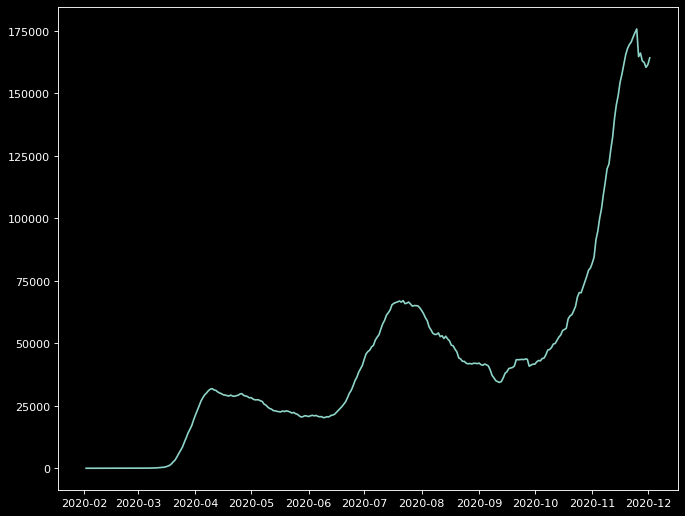

In [8]:
print('\n7 day new US cases as of', mostrecentdatecases)

countryDataTA.index = countryDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(countryDataTA["Rolling7Average"])
plt.show()



7 day average new California cases as of 12/4/20


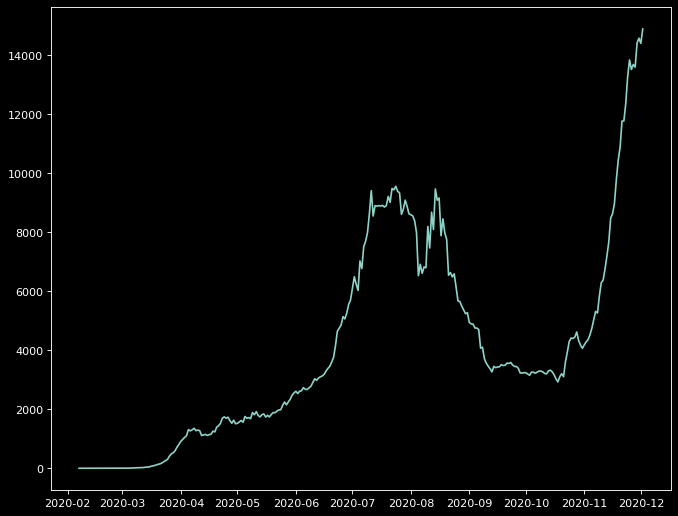

In [9]:
print('\n7 day average new ' + home_state + ' cases as of', mostrecentdatecases)

stateDataTA.index = stateDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(stateDataTA["Rolling7Average"])
plt.show()



7 day average new Los Angeles cases as of 12/4/20


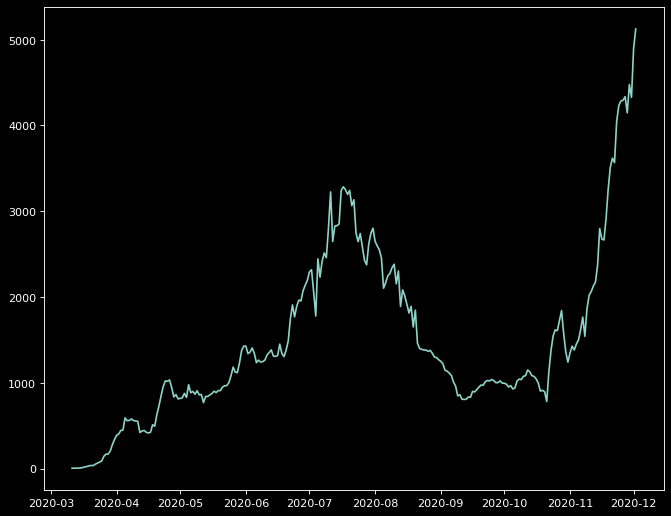

In [10]:
print('\n7 day average new ' + home_county + ' cases as of', mostrecentdatecases)

countyDataTA.index = countyDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(countyDataTA["Rolling7Average"])
plt.show()